In [1]:
import numpy as np
from math import pi

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
plt.style.use('vyason')

from collections import OrderedDict
ls_dict = OrderedDict(
            [('solid',     (0, ())),
            ('ldot',      (0, (1, 10))),
            ('dot',       (0, (1, 5))),
            ('ddot',      (0, (1, 1))),
            ('ldash',     (0, (5, 10))),
            ('dash',      (0, (5, 5))),
            ('ddash',     (0, (5, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1))),
            ('ldashdot',  (0, (3, 10, 1, 10, 1, 10))),
            ('dashdot',   (0, (3, 5, 1, 5, 1, 5))),
            ('ddashdot',  (0, (3, 1, 1, 1, 1, 1)))])

In [2]:
hb = 1.05457182e-34
c = 299792458
G = 6.6743e-11
kB = 1.380649e-23

rho_Os = 22587.2
rho_SiO2 = 2650

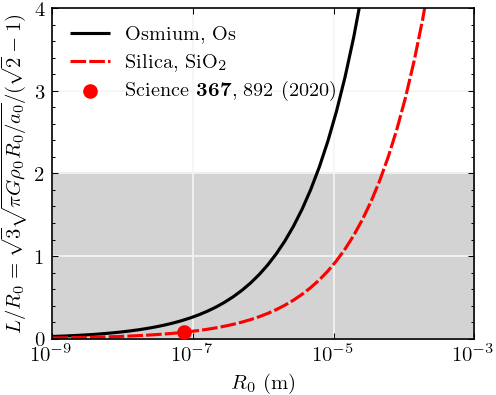

In [13]:

def_width,def_height = plt.rcParams["figure.figsize"]
def_height = 0.8*def_width

fig = plt.figure(constrained_layout=True,dpi=150)
ax = fig.add_gridspec(1,1).subplots()
fig.set_size_inches(def_width,def_height)


a0 = 1.2e-10
R0 = np.logspace(-9,-3)     #10 nm to $10 um
ax.set_xlim(1e-9,1e-3)

rho_list = [rho_Os,rho_SiO2]
c_list = ['black','red']
ls_list = [ls_dict['solid'],ls_dict['ddash']]
label_list = [r'Osmium, Os',r'Silica, SiO$_2$']


def calc_LR0_min(R0,rho):
    return ( np.sqrt(3)/(np.sqrt(2)-1) )*np.sqrt(pi*G*rho*R0/(a0))


for i in range(len(rho_list)):
    rho = rho_list[i]

    LR0_min = calc_LR0_min(R0,rho)

    ax.plot(R0,LR0_min,color=c_list[i],ls=ls_list[i],label=label_list[i])
    ax.set_xscale('log')


ax.set_ylim(0,4)
ax.set_xlabel(r'$R_0$ (m)')
ax.set_ylabel(r'$L/R_0 = \sqrt{3} \sqrt{ \pi G \rho_0 R_0 / a_0 } / (\sqrt{2}-1)$')

ax.fill_between(R0,0,2,color='lightgrey')


#aspelmeyer papaer
########################################################
R0 = 75e-9
LR0_min = calc_LR0_min(R0,rho_SiO2)
ax.scatter(R0,LR0_min,c='red',label=r'Science \textbf{367}, 892 (2020)',zorder=99)

ax.grid()
ax.legend(loc='upper left',fontsize=9.5)


fig.savefig('MOND_LR0.pdf')